In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import os
import glob
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
IMG_SHAPE = 64
base_dir = "/content/drive/My Drive/Intermediate_Assignment_Dataset (1)"


In [ ]:
classes = ['NoSunglasses','YesSunglasses']


In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '*.pgm')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

NoSunglasses: 313 Images
YesSunglasses: 311 Images


In [ ]:

BASE_DIR = "/content/drive/My Drive/Intermediate_Assignment_Dataset (1)/train"
image_dir = os.path.join(BASE_DIR, "YesSunglasses")
count = 0
path = "/content/drive/My Drive/Intermediate_Assignment_Dataset (1)/train/YesSunglasses/"
for root, dirs, files in os.walk(image_dir):
  for file in files:
    if file.endswith("pgm"):
      path = os.path.join(root, file)
      img = cv2.imread(path,0)
      cv2.imwrite(path + str(count) + ".png",img )
      count = count + 1

BASE_DIR = "/content/drive/My Drive/Intermediate_Assignment_Dataset (1)/val"
image_dir = os.path.join(BASE_DIR, "NoSunglasses")
count = 300
path = "/content/drive/My Drive/Intermediate_Assignment_Dataset (1)/val/NoSunglasses/"
for root, dirs, files in os.walk(image_dir):
  for file in files:
    if file.endswith("pgm"):
      path = os.path.join(root, file)
      img = cv2.imread(path,0)
      cv2.imwrite(path + str(count) + ".png",img )
      count = count + 1

BASE_DIR = "/content/drive/My Drive/Intermediate_Assignment_Dataset (1)/val"
image_dir = os.path.join(BASE_DIR, "YesSunglasses")
count = 300
path = "/content/drive/My Drive/Intermediate_Assignment_Dataset (1)/val/YesSunglasses/"
for root, dirs, files in os.walk(image_dir):
  for file in files:
    if file.endswith("pgm"):
      path = os.path.join(root, file)
      img = cv2.imread(path,0)
      cv2.imwrite(path + str(count) + ".png",img )
      count = count + 1

In [ ]:
BASE_DIR = "/content/drive/My Drive/Intermediate_Assignment_Dataset (1)/train"
image_dir = os.path.join(BASE_DIR, "NoSunglasses")
count = 0
path = "/content/drive/My Drive/Intermediate_Assignment_Dataset (1)/train/NoSunglasses/"
for root, dirs, files in os.walk(image_dir):
  for file in files:
    if file.endswith("pgm"):
      path = os.path.join(root, file)
      img = cv2.imread(path,0)
      cv2.imwrite(path + str(count) + ".png",img )
      count = count + 1

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 499 images belonging to 2 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 125 images belonging to 2 classes.


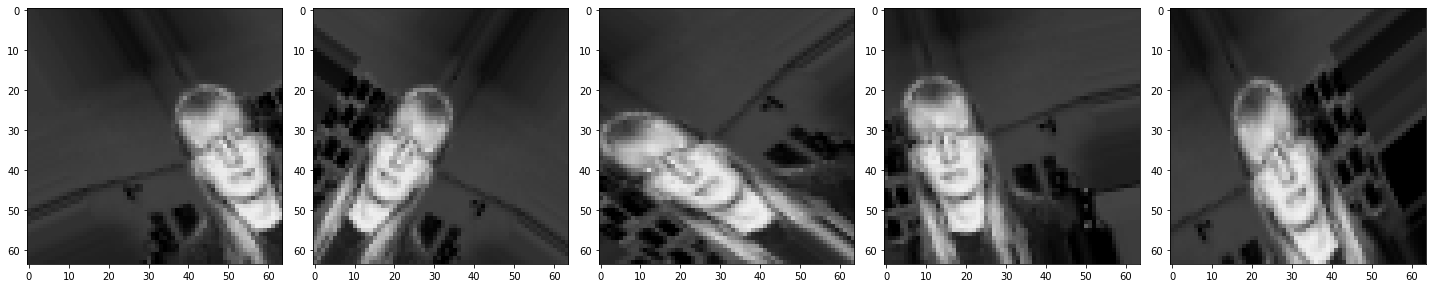

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
        tf.keras.layers.MaxPool2D(pool_size=(2,2),),

        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2),),

        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2),),

        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
classification_threshold = 0.5
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision'),
       tf.keras.metrics.Recall(thresholds=classification_threshold,
                                 name='Recall')]
                               )

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 6, 6, 64)        

In [14]:
epochs=80
history = model.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)
model.save_weights("weights2.h5")

Epoch 1/80
4/4 [==============================] - 86s 21s/step - loss: 0.6862 - accuracy: 0.5230 - precision: 0.5184 - Recall: 0.6225 - val_loss: 0.6670 - val_accuracy: 0.5680 - val_precision: 1.0000 - val_Recall: 0.1290
Epoch 2/80
4/4 [==============================] - 3s 749ms/step - loss: 0.6819 - accuracy: 0.5611 - precision: 0.6630 - Recall: 0.2450 - val_loss: 0.6954 - val_accuracy: 0.4960 - val_precision: 0.4960 - val_Recall: 1.0000
Epoch 3/80
4/4 [==============================] - 3s 697ms/step - loss: 0.6965 - accuracy: 0.5251 - precision: 0.5126 - Recall: 0.9839 - val_loss: 0.6250 - val_accuracy: 0.7840 - val_precision: 0.9487 - val_Recall: 0.5968
Epoch 4/80
4/4 [==============================] - 3s 665ms/step - loss: 0.6766 - accuracy: 0.5531 - precision: 0.7097 - Recall: 0.1767 - val_loss: 0.6218 - val_accuracy: 0.7200 - val_precision: 1.0000 - val_Recall: 0.4355
Epoch 5/80
4/4 [==============================] - 3s 679ms/step - loss: 0.6668 - accuracy: 0.6172 - precision: 0.

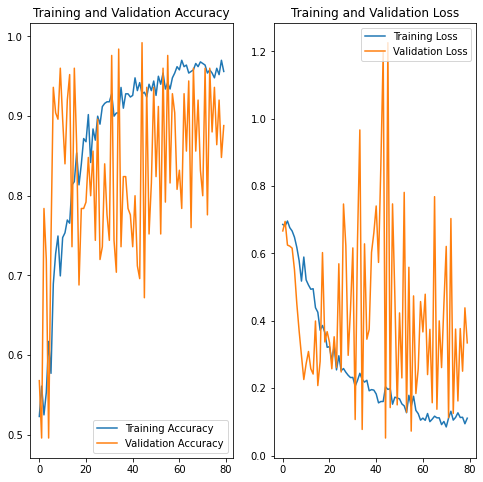

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()